# **Exploring Clustering Algorithms**

## Exploratory Data Analysis 

In [145]:
# Import re libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [146]:
# Load Mall data set into pandas data frame 
df=pd.read_csv("Mall_Customers.csv")

In [147]:
# Print first five rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [148]:
# Size of data set 
df.shape

(200, 5)

In [149]:
# Checking any missing value & feature data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [150]:
# Desciptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [151]:
# Drop customer id feature 
df=df.drop("CustomerID", axis=1 )

In [152]:
# Sumarize data 
# Group by the whole data set by gender
df.groupby("Gender").agg(["mean"])

,Age,Annual Income (k$),Spending Score (1-100)
,mean,mean,mean
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


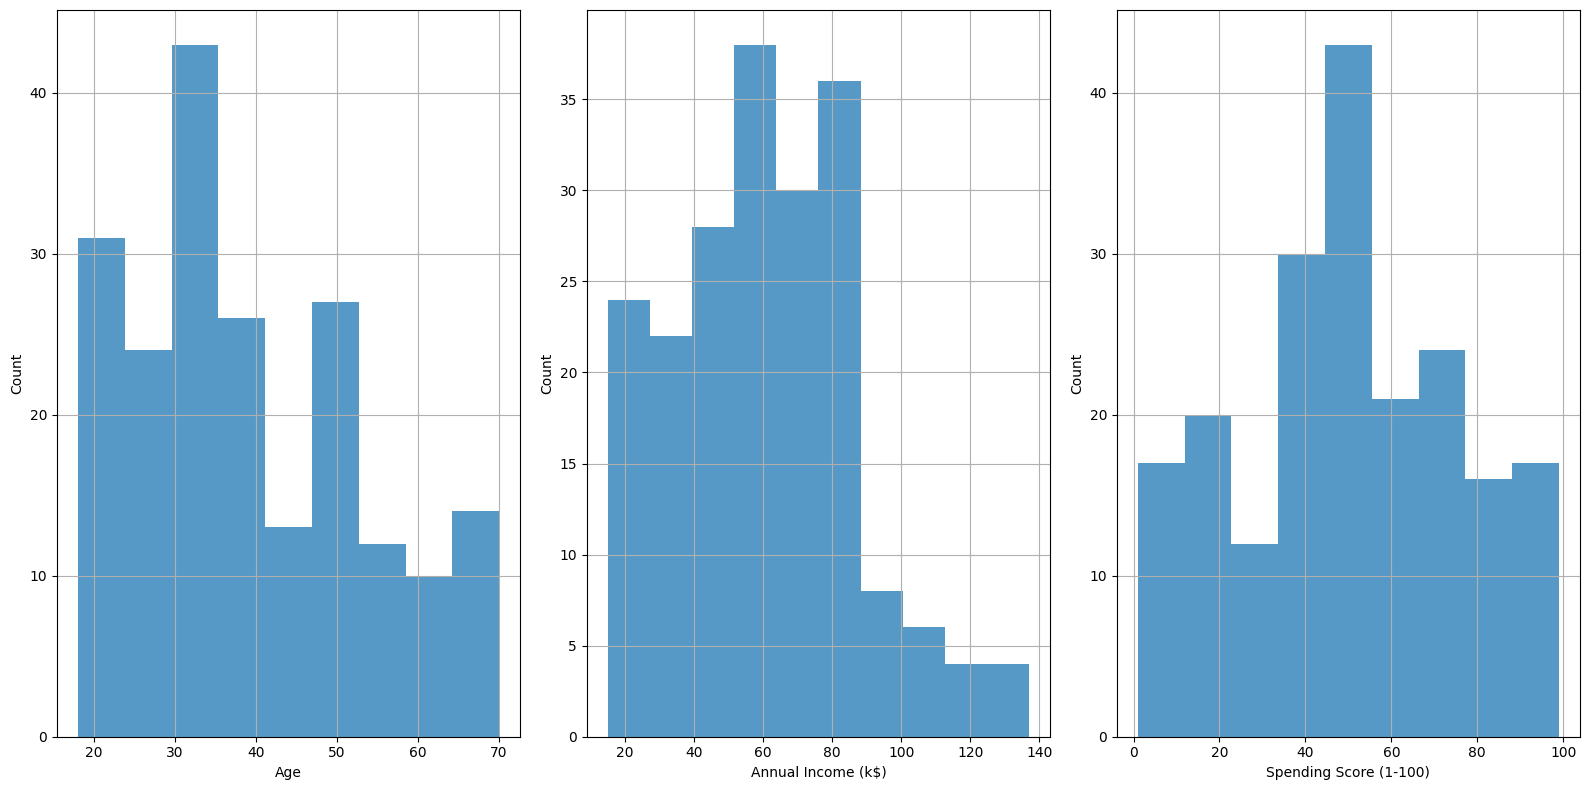

In [153]:
# Data Distribution using histograms 
r=1
plt.figure(figsize=(16,8))

for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.subplot(1,3,r)
    sns.histplot(df[i],  edgecolor=None)
    r+=1
    plt.grid()
plt.tight_layout()
plt.show() 

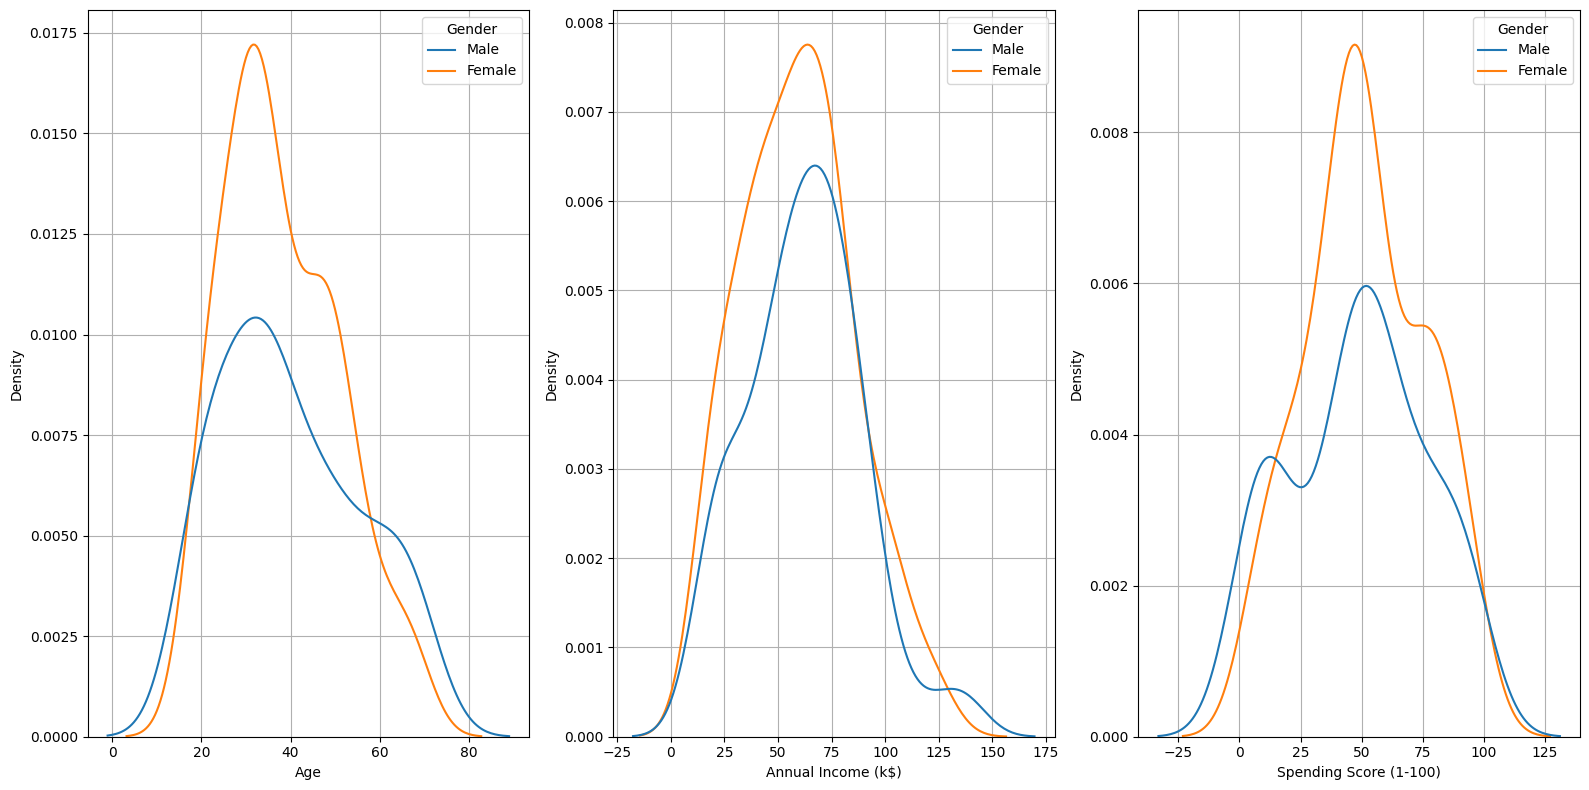

In [154]:
# Data Distribution with gender classes
r=1
plt.figure(figsize=(16,8))

for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.subplot(1,3,r)
    sns.kdeplot(df, x=i,hue="Gender")
    r+=1
    plt.grid()
plt.tight_layout()
plt.show() 

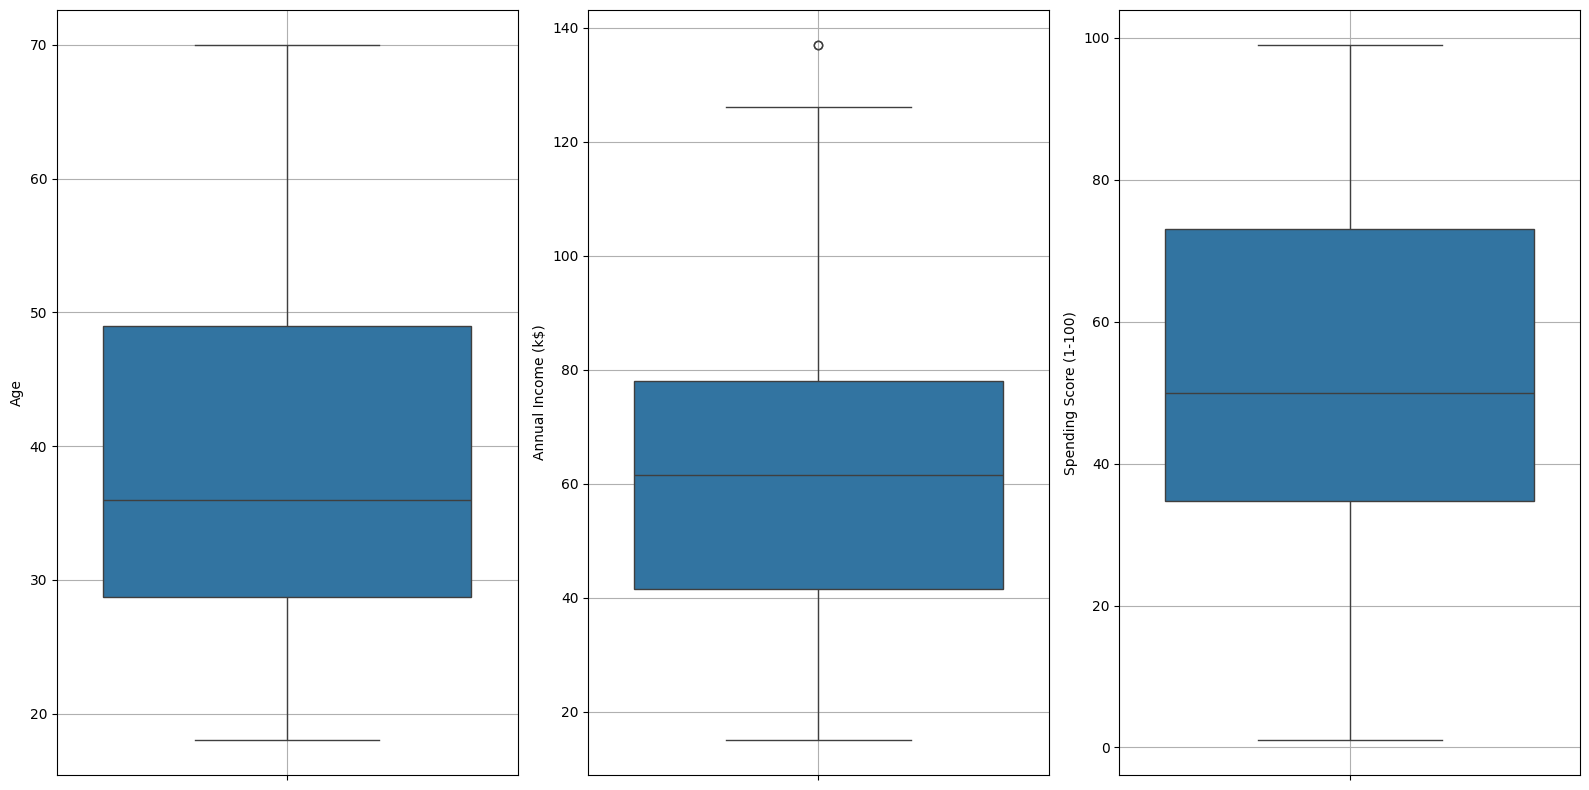

In [155]:
# Check range of numerical features and outlier severity
r=1
plt.figure(figsize=(16,8))

for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.subplot(1,3,r)
    sns.boxplot(df, y=i)
    r+=1
    plt.grid()
plt.tight_layout()
plt.show() 

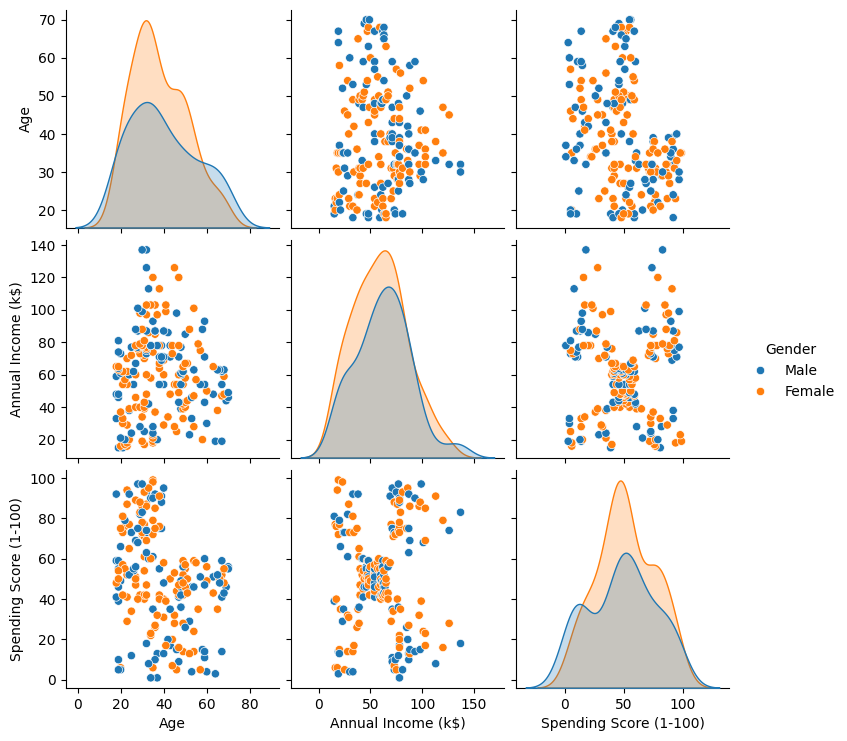

In [156]:
# Pair wise relationship by Gender class 
sns.pairplot(df[["Gender","Age","Annual Income (k$)"	,"Spending Score (1-100)"]], hue="Gender")
plt.show()

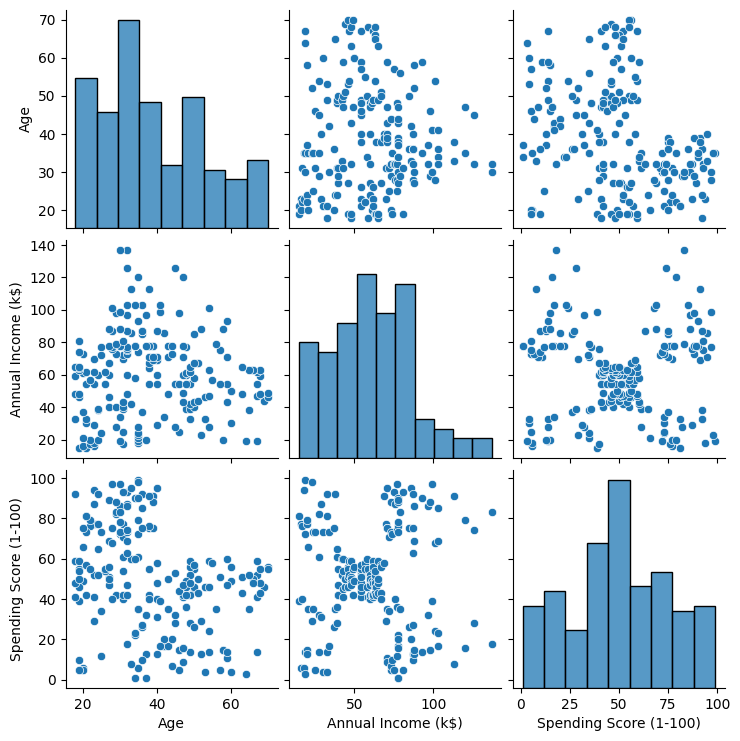

In [157]:
# Pair wise relationship without Gender
sns.pairplot(df[[	"Age"	,"Annual Income (k$)"	,"Spending Score (1-100)"]])
plt.show() 

<br>

## Preprocessing : 

### Converting Categorical Feature , Scaling , Feature Selection 

In [158]:
# Converting Categorical feature "Gender"

df["Gender"]=df["Gender"].map({"Male":0 , "Female":1})

In [160]:
# From Pairplot : Annual Income and Spending Score clearly show distinct clusters. 

# Age does not seem to form clear groupings or obvious clusters with the other two features

df_final=df.drop(["Gender","Age"], axis=1)

In [161]:
df_final

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [162]:
# Scaling data 

from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform
scaled_df = scaler.fit_transform(df_final)


<br>

## K-Mean Clustering 

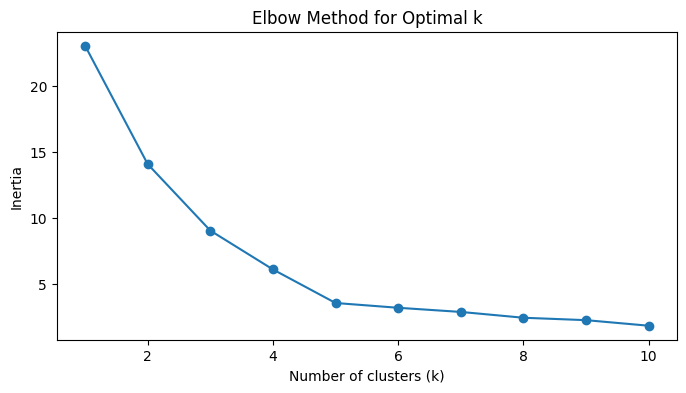

In [163]:
from sklearn.cluster import KMeans


# Fit a K mean clustering 
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

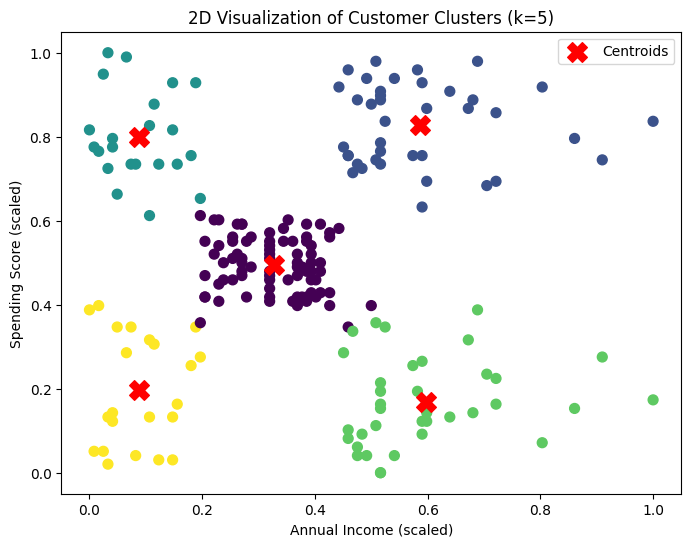

In [170]:
# 2D Visualization 
final_scaled_df = pd.DataFrame(scaled_df, columns=df_final.columns)

# Select  features explicitly
X = final_scaled_df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Run KMeans with optimal k=5
kmeans = KMeans(n_clusters=5, random_state=42)
final_scaled_df['Cluster'] = kmeans.fit_predict(X)

# 2D Visualization
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=final_scaled_df['Cluster'], cmap='viridis', s=50)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('2D Visualization of Customer Clusters (k=5)')
plt.legend()
plt.show()


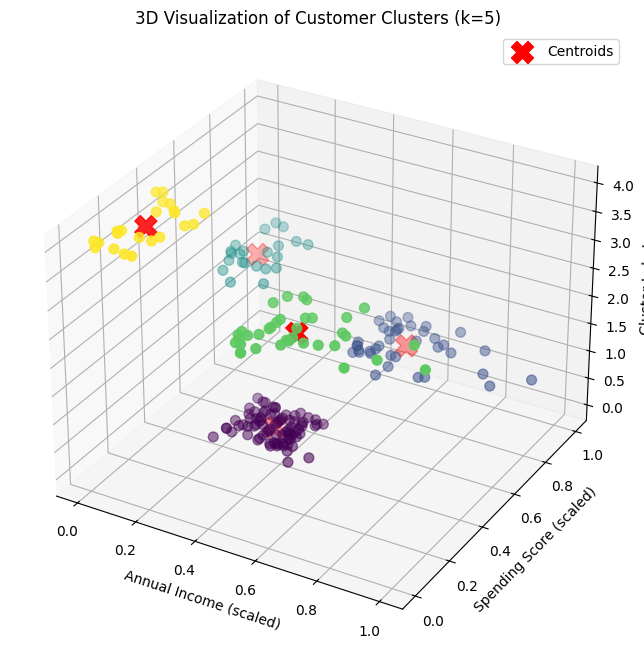

In [172]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import numpy as np

# Data preparation (assuming scaling is already done)
final_scaled_df = pd.DataFrame(scaled_df, columns=df_final.columns)

# Select your two features explicitly
X = final_scaled_df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply KMeans clustering (k=5 as optimal)
kmeans = KMeans(n_clusters=5, random_state=42)
final_scaled_df['Cluster'] = kmeans.fit_predict(X)

# 3D Visualization (Clusters as the third dimension)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Plotting data points with cluster labels as the z-axis
scatter = ax.scatter(
    X.iloc[:, 0], 
    X.iloc[:, 1], 
    final_scaled_df['Cluster'],  # Using clusters as the vertical dimension
    c=final_scaled_df['Cluster'], 
    cmap='viridis', 
    s=50
)

# Plot cluster centroids
ax.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    np.arange(kmeans.n_clusters),  # centroids at their cluster index
    s=250, c='red', marker='X', label='Centroids'
)

# Label axes clearly
ax.set_xlabel('Annual Income (scaled)')
ax.set_ylabel('Spending Score (scaled)')
ax.set_zlabel('Cluster Label')
ax.set_title('3D Visualization of Customer Clusters (k=5)')
ax.legend()

plt.show()


<br>

## Hierarchical Clustering

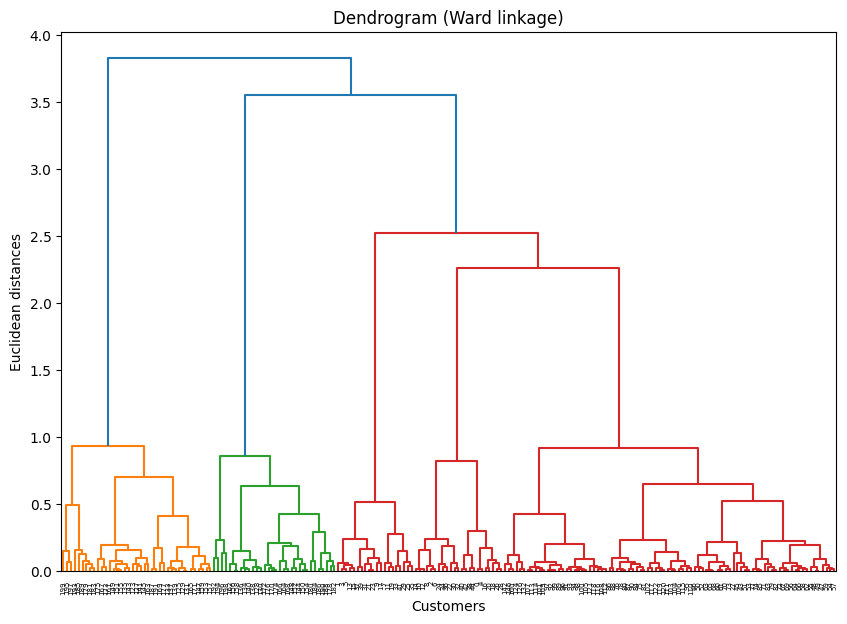

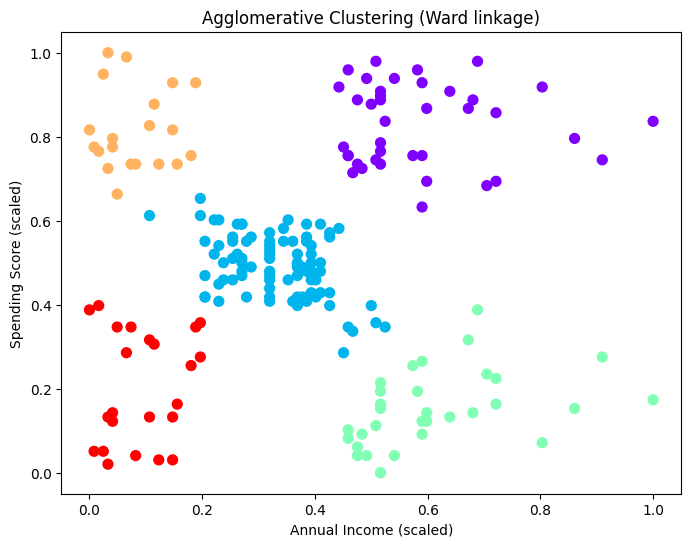

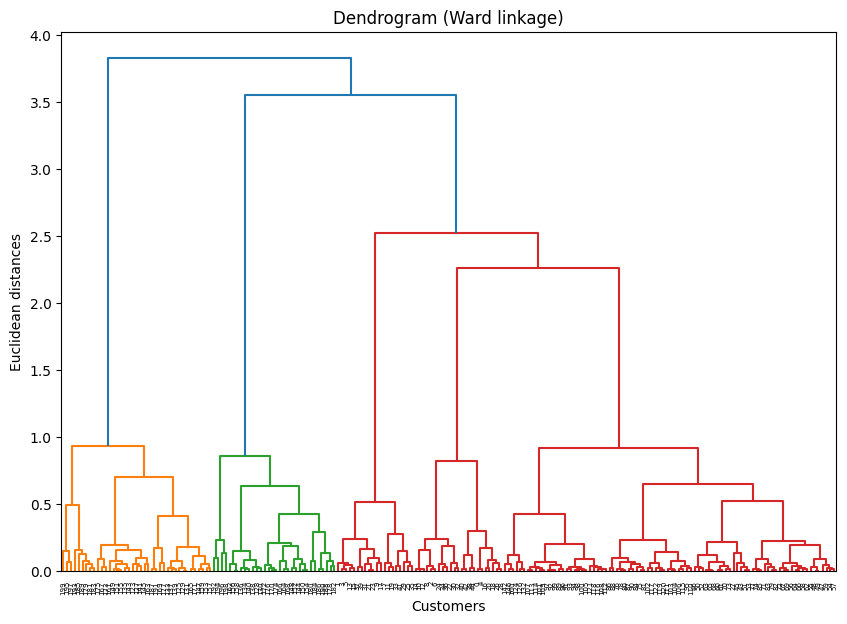

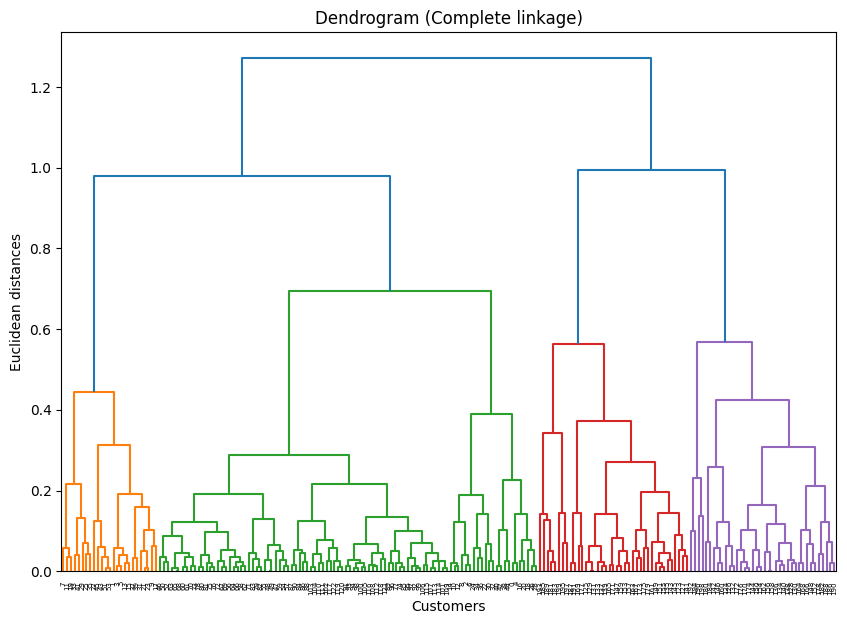

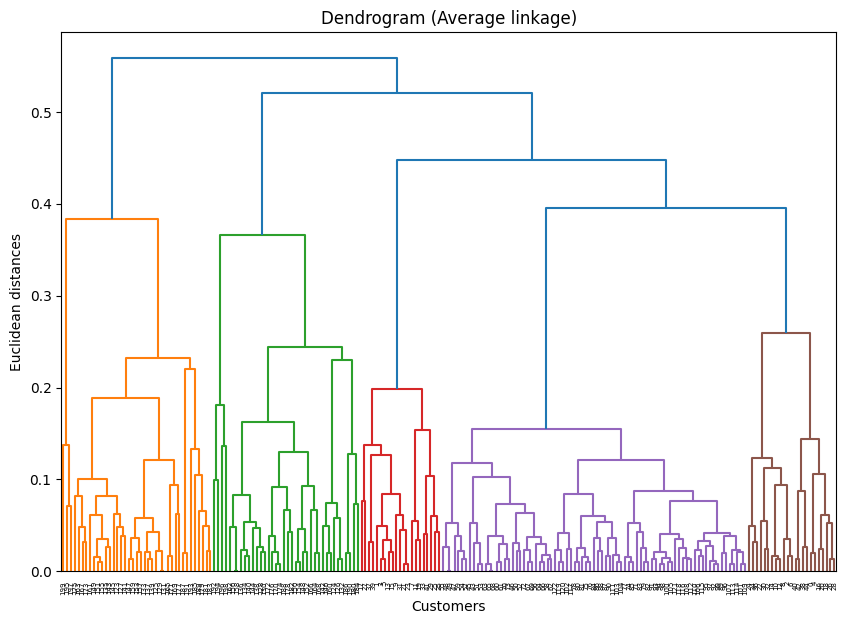

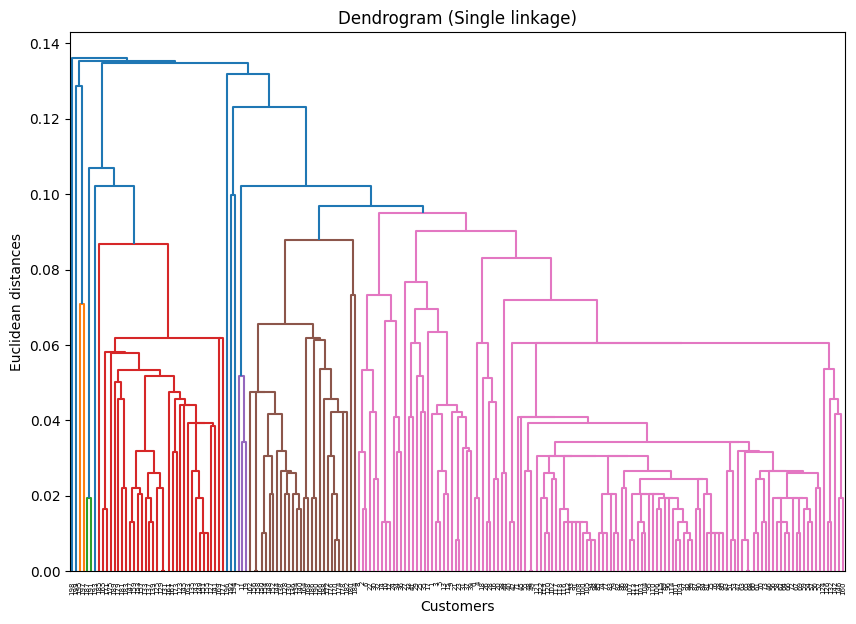

In [173]:
# Hierarchical Clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Define features explicitly
X = final_scaled_df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram (Ward linkage)')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Agglomerative clustering (optimal clusters from dendrogram, e.g., 5)
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
final_scaled_df['HC_Cluster'] = hc.fit_predict(X)

# Visualize the Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=final_scaled_df['HC_Cluster'], cmap='rainbow', s=50)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Agglomerative Clustering (Ward linkage)')
plt.show()

# Compare different linkage methods
methods = ['ward', 'complete', 'average', 'single']

for method in methods:
    plt.figure(figsize=(10, 7))
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title(f'Dendrogram ({method.capitalize()} linkage)')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()


<br>

## Models Evaluation and Interpretation 

In [176]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering

X = final_scaled_df[['Annual Income (k$)', 'Spending Score (1-100)']]

# KMeans clustering (k=5 from elbow)
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

# Agglomerative clustering (Ward, k=5 from dendrogram)
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels_agglo = agglo.fit_predict(X)

# Silhouette Scores
score_kmeans = silhouette_score(X, labels_kmeans)
score_agglo = silhouette_score(X, labels_agglo)

print(f"KMeans Silhouette Score: {score_kmeans:.3f}")
print(f"Agglomerative Clustering Silhouette Score: {score_agglo:.3f}")




KMeans Silhouette Score: 0.559
Agglomerative Clustering Silhouette Score: 0.558


In [178]:

final_scaled_df['Cluster'] = labels_kmeans  #  KMeans performed better

# Profile each cluster
profiles = final_scaled_df.groupby('Cluster').mean()
print(profiles)


         Annual Income (k$)  Spending Score (1-100)  HC_Cluster
Cluster                                                        
0                  0.326958                0.495339    1.037037
1                  0.586381                0.827839    0.000000
2                  0.087928                0.799629    2.818182
3                  0.596311                0.169218    1.888889
4                  0.087928                0.196197    4.000000


In [182]:
# Interpretation 
cluster_labels = {
    0: "Moderate Income - Moderate Spending",
    1: "High Income - High Spending",
    2: "Low Income - High Spending",
    3: "High Income - Low Spending",
    4: "Low Income - Low Spending"
}

final_scaled_df['Cluster Label'] = final_scaled_df['Cluster'].map(cluster_labels)
print(final_scaled_df[['Cluster', 'Cluster Label']].head())


   Cluster               Cluster Label
0        4   Low Income - Low Spending
1        2  Low Income - High Spending
2        4   Low Income - Low Spending
3        2  Low Income - High Spending
4        4   Low Income - Low Spending


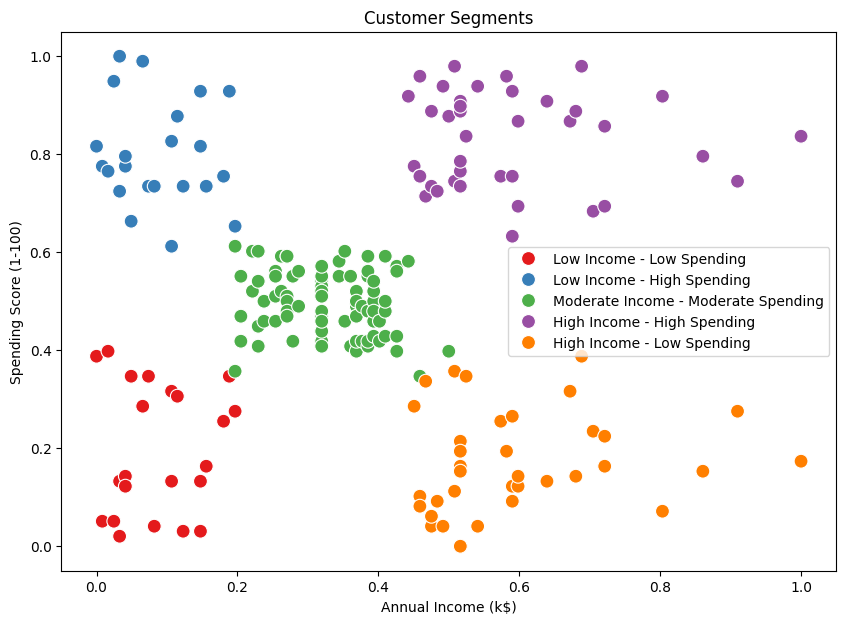

In [183]:

# Visualize clusters with labels clearly
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)',
    hue='Cluster Label', 
    data=final_scaled_df,
    palette='Set1', s=100
)

plt.title('Customer Segments')
plt.legend()
plt.show()


## Business Action Suggestions

High Income - High Spending: Exclusive offers, premium loyalty .

High Income - Low Spending: Targeted luxury incentives, personalized deals.

Moderate Income - Moderate Spending: Regular promotions, balanced incentives.

Low Income - High Spending: Frequent discounts.

Low Income - Low Spending: Entry-level deals.